<a href="https://colab.research.google.com/github/patofw/imf_master/blob/master/Google_Colab/CLASIFICACION_IMAGENES_ANN_MINST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Instalamos TensorFlow en Colab para tener tensorflow 2
#!pip install -q tensorflow-gpu==2.0.0-beta1 

try:
  %tensorflow_version 2.x  # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `2.x  # Colab only.`. This will be interpreted as: `2.x`.


TensorFlow 2.x selected.
2.2.0


In [0]:
import matplotlib.pyplot as plt

# Clasificación de Imágenes en Python con Tensforflow 2

[Tensorflow](https://www.tensorflow.org/) es uno de los frameworks más importantes del mundo para desarrollo de modelos de Machine Learning. Nos permite realizar modelos de todo tipo, pero es potencialmente poderoso para modelos más complejos como Redes Neuronales, Convolucionales y Recurrentes. Estos últimos siendo los más utilizados en tareas complejas como visión artificial y NLP.

## Ejercicio. 

Vamos a tratar de clasificar imágenes  de dígitos escritos a 'mano'. Como fuente de datos utilizaremos el famoso set de [MINST](http://yann.lecun.com/exdb/mnist/)

Algunos ejemplos se muestran a continuación:

![Image of Minst](https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2019/02/Plot-of-a-Subset-of-Images-from-the-MNIST-Dataset.png)

Para la clasificación construiremos una red neuronal simple. En este módulo no entraremos en la parte teórica ni matemática de estos algoritmos. Pero si quieres explorar más sobre cómo funcionan puedes hacerlo en el siguiente [enlace](https://towardsdatascience.com/understanding-neural-networks-what-how-and-why-18ec703ebd31)



In [4]:
# Empezamos cargando los datos directamente de la API de Tensforflow
mnist = tf.keras.datasets.mnist

# En casi todo modelo de machine learning se acostumbra separar 
# los datos entre set de entrenamiento y de prueba. 
# En este caso, la API de Tensoroflow ya lo tiene preparado para nosotros. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Vamos a escalar los datos ya que todas las imagenes son pixeles en escala de grises
# Entre 0 y 255. Si dividimos cada valor por 255, normalizaríamos el dataset. 
x_train, x_test = x_train / 255.0, x_test / 255.0 
print("x_train.shape:", x_train.shape) # vemos la forma del dataset de entrenamiento

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [0]:
# Construimos el modelo utilizando la API de Keras. 
# Las redes nueronales tienen 3 capas principales, input, densas y output. 
# Podemos agregar cuantas capas densas creamos adecuadas, solo necesitamos 
# Asegurarnos que el output sea igual a la cantidad de categorías que tenemos
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # el 28 viene del shape, esto es usualmente lo que se acostumbra
  tf.keras.layers.Dense(128, activation='relu'), # capa densa de 128 neuronas. Activacion relu 
  tf.keras.layers.Dropout(0.2), # capa que nos ayuda a prevenir el overfitting
  tf.keras.layers.Dense(10, activation='softmax') # 10 clases de output  
])

In [0]:
# Una vez construido el modelo, lo compilamos 
# Para esto elegimos el optimizador, la función de coste y la 
# métrica que usará el modelo en su entrenamiento. 
model.compile(optimizer='adam', # muy práctico en clasificación multiclase
              loss='sparse_categorical_crossentropy', # función de coste para multicategoría
              metrics=['accuracy']) # buscamos optimizar la precisión (accuracy)

In [7]:
# Entrenamos el modelo con la función de fit 
# Dejamos que Keras haga su magia
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2972 - accuracy: 0.9136 - val_loss: 0.1387 - val_accuracy: 0.9578
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1412 - accuracy: 0.9577 - val_loss: 0.1072 - val_accuracy: 0.9687
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1076 - accuracy: 0.9670 - val_loss: 0.0906 - val_accuracy: 0.9722
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0885 - accuracy: 0.9722 - val_loss: 0.0804 - val_accuracy: 0.9759
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0767 - accuracy: 0.9753 - val_loss: 0.0721 - val_accuracy: 0.9770
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0669 - accuracy: 0.9787 - val_loss: 0.0750 - val_accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0583 - accuracy: 0.9814 - val_loss: 0.0660 - val_accuracy:

# Podemos ver como se entrenó el modelo y su función de coste


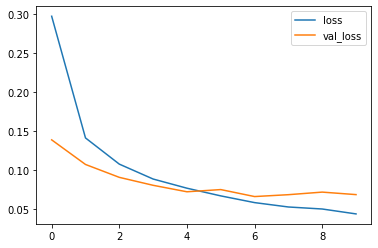

In [8]:
# Plot loss per iteration
# El objetivo es que la curva parezca un 'codo', si no llega
# a la curva de codo, podemos seguir lanzando más epochs, si 
# esta mucho tiempo en la sección plana de la curva, podemos 
# estar en riesgo de overfitting
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

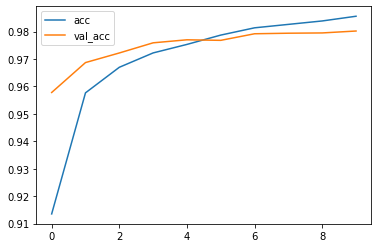

In [9]:
# Crecimiento de la precisión por iteración (epochs)
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [10]:
# Evaluamos la precisión del modelo utilizando el set de prueba
costo,accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy del Modelo: {round(accuracy,3)}") 

313/313 [==============================] - 0s 1ms/step - loss: 0.0685 - accuracy: 0.9802
Accuracy del Modelo: 0.98


El modelo es bastante preciso y funciona aparentemente bien, pero se ha equivocado en algunas ocasiones. Podemos ver qué dígitos le cuestan más, e imprimir algunos ejemplos de los fallos. 

Matriz de Confusión, sin normalización
[[ 973    0    1    1    1    0    1    1    2    0]
 [   0 1128    2    1    0    0    2    0    2    0]
 [   3    3 1007    4    4    0    1    7    3    0]
 [   1    0    4  992    0    5    0    4    2    2]
 [   1    0    1    1  961    1    3    2    1   11]
 [   2    0    0    7    0  874    2    1    5    1]
 [   7    3    0    1    1    5  940    0    1    0]
 [   2    3    8    2    0    1    0 1007    0    5]
 [   7    1    1    4    3    4    1    5  943    5]
 [   2    3    0    5    6    8    0    8    0  977]]


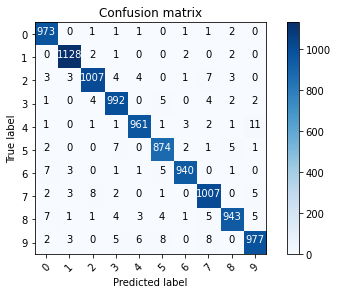

In [12]:
# Matriz de confusión para ver donde nos hemos equivocado
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Matriz de Confusión, sin normalización')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

# Tiene sentido?
# Es fácil confundir 9 <--> 4, 9 <--> 7, 2 <--> 7, etc. 

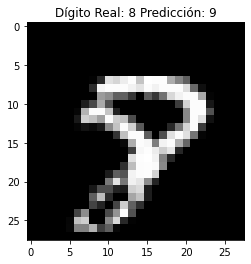

In [14]:
# Ejemplos de dónde hemos fallado
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("Dígito Real: %s Predicción: %s" % (y_test[i], p_test[i]));